# Spam filtering 

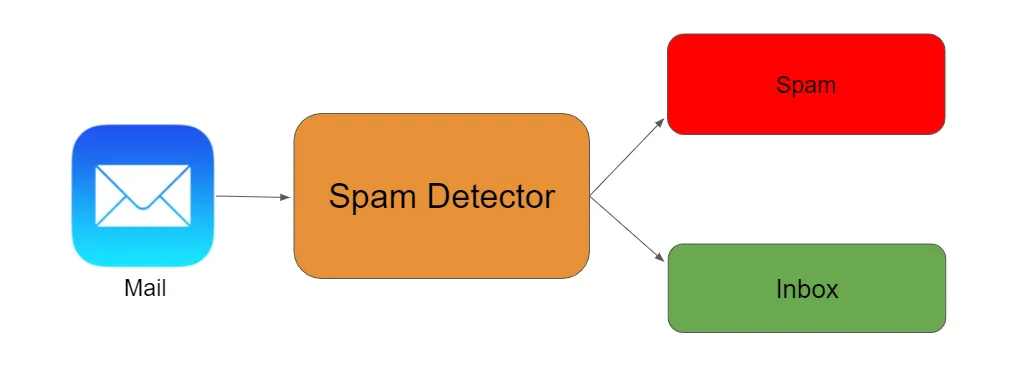

# About Dataset:
The "spam" dataset typically refers to a collection of text messages or emails that are labeled as either "spam" (unsolicited and often unwanted messages) or "ham" (legitimate messages). This dataset is commonly used for training and evaluating machine learning models for spam detection or text classification tasks. The dataset provides a labeled set of examples that helps algorithms learn to distinguish between spam and non-spam messages based on their content.

In [1]:
import pandas as pd
import os , sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as po
from plotly.subplots import make_subplots
from prettytable import PrettyTable


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df= pd.read_csv('spam.tsv', sep='\t')

In [4]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


# Data Cleaning and Preprocessing

## Target Imbalance Treatment

In [7]:
print(df.label.value_counts())
      
#fig = px.pie(df.label.value_counts(), values=df.label.value_counts().values, names=df.label.value_counts().index, title='Target Distibution')
#fig.show()

ham     4825
spam     747
Name: label, dtype: int64


ham     4825
spam     747
Name: label, dtype: int64


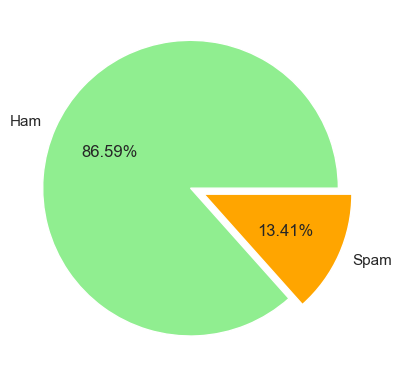

In [8]:
    
label_value_counts = df.label.value_counts()
print(label_value_counts)
labels = ['Ham', 'Spam']
colors =['lightgreen','orange']
plt.pie(label_value_counts,autopct='%1.2f%%',labels = labels, colors=colors, explode=[0.1,0] )
plt.show()

__Observation__:

    There is significant imbalance in out dataset as major class value is greater twice the minor class

In [9]:
ham = df[df.label =='ham']
spam =df[df.label =='spam']
print('Before Imbalance Treatment:')
print( 'ham  :', ham.shape,'\nspam :', spam.shape)
# when text analytics use sample() method as to use imblearn , out data must be number
spam = spam.sample(ham.shape[0], replace = True)
print()
print('After Imbalance Treatment:')
print( 'ham  :', ham.shape,'\nspam :', spam.shape)

Before Imbalance Treatment:
ham  : (4825, 4) 
spam : (747, 4)

After Imbalance Treatment:
ham  : (4825, 4) 
spam : (4825, 4)


In [10]:
data=ham.append(spam, ignore_index=True)
data.shape

(9650, 4)

# Duplicates removal

In [11]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(df)

The total duplicate row before removing duplicate: 403
The total duplicate row after removing duplicate: 0  
shape of dataset after removing duplicate columns : (5169, 4)


# Encoding

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    9650 non-null   object
 1   message  9650 non-null   object
 2   length   9650 non-null   int64 
 3   punct    9650 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 301.7+ KB


In [13]:
data['label']=data['label'].map({'ham':0, 'spam':1})
data.label.value_counts()

0    4825
1    4825
Name: label, dtype: int64

# Text Preprocessing



Some of the common text preprocessing / cleaning steps are:

* Tokenization
* Casefolding
* Removal of Punctuations
* Removal of Stopwords
* Removal of Frequent words
* Removal of Rare words
* Number to words/ignoring numbers
* Normaliation using Stemming or Lemmatization 
* Removal/Conversion of emojis and emoticons
* Removal of URLs
* Removal of HTML tags
* Chat words conversion
* Spelling correction

As the use is spam filter we can remove the emojis, empoticons

In [14]:
data.message[:10]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    U dun say so early hor... U c already then say...
3    Nah I don't think he goes to usf, he lives aro...
4    Even my brother is not like to speak with me. ...
5    As per your request 'Melle Melle (Oru Minnamin...
6    I'm gonna be home soon and i don't want to tal...
7    I've been searching for the right words to tha...
8                  I HAVE A DATE ON SUNDAY WITH WILL!!
9                           Oh k...i'm watching here:)
Name: message, dtype: object

In [15]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize, WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud ,STOPWORDS 
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import wordnet


In [16]:
lem=WordNetLemmatizer()
stopwords_list=stopwords.words('english')
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
corpus=[]
for i in range(0, len(data)):
    text=data.message[i]
    text=text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters 
    pos_tagged_text = nltk.pos_tag(word_tokenize(text))
    lemmed_words=[lem.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text if word not in stopwords_list]
    text=' '.join(lemmed_words)
    corpus.append(text) 

In [17]:
data['cleaned_message']=corpus

In [18]:
data.head()

,label,message,length,punct,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",111,9,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joking wif u oni
2,0,U dun say so early hor... U c already then say...,49,6,u dun say early hor u c already say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,2,nah think go usf live around though
4,0,Even my brother is not like to speak with me. ...,77,2,even brother like speak treat like aid patent


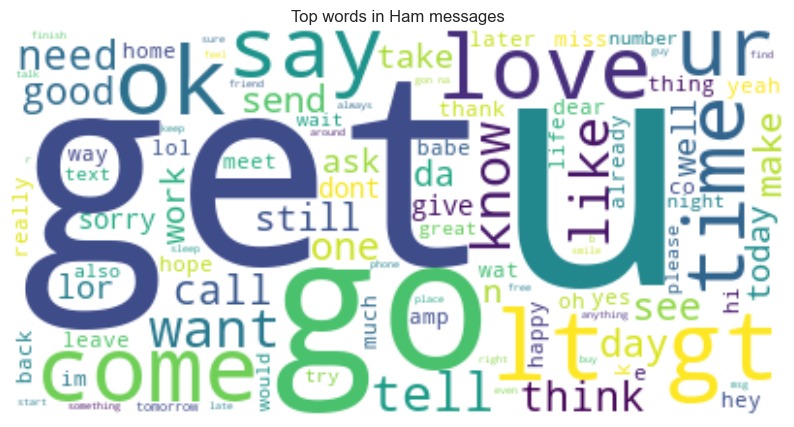

In [19]:
# Word cloud in Ham messeges

wordcloud=WordCloud(max_words=100,stopwords=stopwords_list,background_color='white')
wordcloud.generate(data[data.label==0]['cleaned_message'].str.cat(sep = " "))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis('off')
plt.title('Top words in Ham messages')
#plt.grid(visible=None)
plt.show()

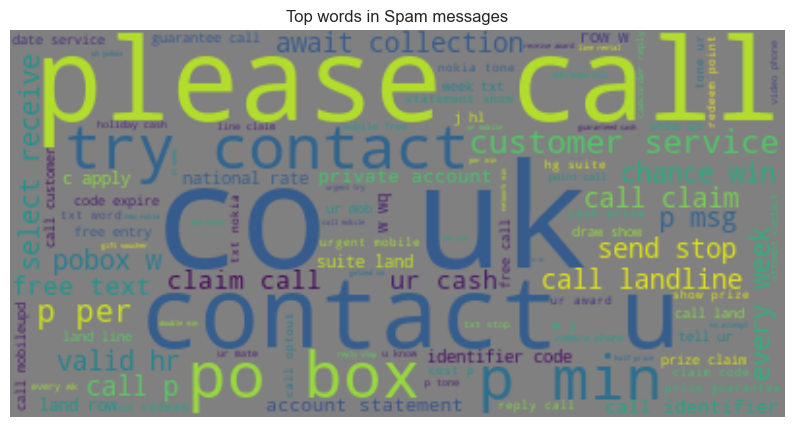

In [20]:
# word cloud in Spam messages

wordcloud=WordCloud(max_words=100,background_color='gray')
wordcloud.generate(data[data.label==1]['cleaned_message'].str.cat(sep = " "))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis('off')
plt.title('Top words in Spam messages')
#plt.grid(visible=None)
plt.show()

__Observation__:
    
* In Spam messages have words like 'Guarantee', 'Please call','Urgent', 'Chance to win','Claim call' which are suspicious words 
* Whereas , ham messages words seems normal 

# Model Building
   
* Text analytics involves high dimentionality. To handle high dimentionality we will be using below models 
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
    * Random Forest
   
   

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score,roc_curve,auc,RocCurveDisplay,ConfusionMatrixDisplay
    

# Vectorization

In [22]:
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(data['cleaned_message']).toarray()

In [23]:
y=data.label

In [24]:
x_train, x_test, y_train, y_test= train_test_split(x, y , test_size=0.2, random_state=42)

# GaussianNB

In [25]:
clf_gnb = GaussianNB()
clf_gnb.fit(x_train, y_train)
y_pred_train_gnb= clf_gnb.predict(x_train)
y_pred_test_gnb= clf_gnb.predict(x_test)

Train_AUC_gnb = roc_auc_score(y_train,clf_gnb.predict_proba(x_train)[:,1])
Train_accuracy_gnb = accuracy_score(y_train,y_pred_train_gnb)
Train_f1_gnb = f1_score(y_train,y_pred_train_gnb)

Test_AUC_gnb = roc_auc_score(y_test,clf_gnb.predict_proba(x_test)[:,1])
Test_accuracy_gnb = accuracy_score(y_test,y_pred_test_gnb)
Test_f1_gnb = f1_score(y_test,y_pred_test_gnb)


# Cross Validation 
gnb_train_accuracy = cross_val_score(clf_gnb, x_train, y_train, cv=10).mean()
gnb_test_accuracy = cross_val_score(clf_gnb, x_test, y_test, cv=10).mean()


summary_table = PrettyTable(["Model", "Train_auc_score", "Train_accuracy",'CV_Mean_Train_Accuracy',"Train_f1" ,"Test_auc_score",'Test_accuracy','CV_Mean_Test_Accuracy' ,'Test_f1']) #heading
summary_table.add_row(["GaussianNB",round(Train_AUC_gnb,3),round(Train_accuracy_gnb, 3),round(gnb_train_accuracy ,3), round(Train_f1_gnb,3),round(Test_AUC_gnb,3),round(Test_accuracy_gnb,3), round(gnb_test_accuracy ,3),round(Test_f1_gnb,3) ])

table = pd.read_html(summary_table.get_html_string())
Gaussian_NB_Classifier_Result = table[0]
Gaussian_NB_Classifier_Result

,Model,Train_auc_score,Train_accuracy,CV_Mean_Train_Accuracy,Train_f1,Test_auc_score,Test_accuracy,CV_Mean_Test_Accuracy,Test_f1
0,GaussianNB,0.946,0.946,0.92,0.949,0.929,0.927,0.888,0.931


# Bernoulli's NB

In [26]:
clf_bnb = BernoulliNB()
clf_bnb.fit(x_train, y_train)
y_pred_train_bnb= clf_bnb.predict(x_train)
y_pred_test_bnb= clf_bnb.predict(x_test)

Train_AUC_bnb = roc_auc_score(y_train,clf_bnb.predict_proba(x_train)[:,1])
Train_accuracy_bnb = accuracy_score(y_train,y_pred_train_bnb)
Train_f1_bnb = f1_score(y_train,y_pred_train_bnb)

Test_AUC_bnb = roc_auc_score(y_test,clf_bnb.predict_proba(x_test)[:,1])
Test_accuracy_bnb = accuracy_score(y_test,y_pred_test_bnb)
Test_f1_bnb = f1_score(y_test,y_pred_test_bnb)

# Cross Validation 
bnb_train_accuracy = cross_val_score(clf_bnb, x_train, y_train, cv=10).mean()
bnb_test_accuracy = cross_val_score(clf_bnb, x_test, y_test, cv=10).mean()



summary_table = PrettyTable(["Model", "Train_auc_score", "Train_accuracy",'CV_Mean_Train_Accuracy',"Train_f1" ,"Test_auc_score",'Test_accuracy','CV_Mean_Test_Accuracy' ,'Test_f1']) #heading
summary_table.add_row(["BernoulliNB",round(Train_AUC_bnb,3),round(Train_accuracy_bnb, 3),round(bnb_train_accuracy ,3),round(Train_f1_bnb,3),round(Test_AUC_bnb,3),round(Test_accuracy_bnb,3), round(bnb_test_accuracy ,3),round(Test_f1_bnb,3) ])

table = pd.read_html(summary_table.get_html_string())
Bernoulli_NB_Classifier_Result = table[0]
Bernoulli_NB_Classifier_Result

,Model,Train_auc_score,Train_accuracy,CV_Mean_Train_Accuracy,Train_f1,Test_auc_score,Test_accuracy,CV_Mean_Test_Accuracy,Test_f1
0,BernoulliNB,0.999,0.984,0.983,0.984,0.999,0.985,0.979,0.985


# Multinomial NB

In [27]:
clf_mnb = MultinomialNB()
clf_mnb.fit(x_train, y_train)
y_pred_train_mnb= clf_mnb.predict(x_train)
y_pred_test_mnb= clf_mnb.predict(x_test)

Train_AUC_mnb = roc_auc_score(y_train,clf_mnb.predict_proba(x_train)[:,1])
Train_accuracy_mnb = accuracy_score(y_train,y_pred_train_mnb)
Train_f1_mnb = f1_score(y_train,y_pred_train_mnb)

Test_AUC_mnb = roc_auc_score(y_test,clf_mnb.predict_proba(x_test)[:,1])
Test_accuracy_mnb = accuracy_score(y_test,y_pred_test_mnb)
Test_f1_mnb = f1_score(y_test,y_pred_test_mnb)

# Cross Validation 
mnb_train_accuracy = cross_val_score(clf_mnb, x_train, y_train, cv=10).mean()
mnb_test_accuracy = cross_val_score(clf_mnb, x_test, y_test, cv=10).mean()


summary_table = PrettyTable(["Model", "Train_auc_score", "Train_accuracy",'CV_Mean_Train_Accuracy',"Train_f1" ,"Test_auc_score",'Test_accuracy','CV_Mean_Test_Accuracy' ,'Test_f1']) #heading
summary_table.add_row(["MultinomialNB",round(Train_AUC_mnb,3),round(Train_accuracy_mnb, 3),round(mnb_train_accuracy ,3), round(Train_f1_mnb,3),round(Test_AUC_mnb,3),round(Test_accuracy_mnb,3),round(mnb_test_accuracy ,3), round(Test_f1_mnb,3) ])

table = pd.read_html(summary_table.get_html_string())
Multinomial_NB_Classifier_Result = table[0]
Multinomial_NB_Classifier_Result

,Model,Train_auc_score,Train_accuracy,CV_Mean_Train_Accuracy,Train_f1,Test_auc_score,Test_accuracy,CV_Mean_Test_Accuracy,Test_f1
0,MultinomialNB,0.999,0.983,0.977,0.983,0.999,0.977,0.962,0.976


# Random Forest Classifier

In [28]:
clf_rf = RandomForestClassifier(random_state=42, n_estimators=100)
clf_rf.fit(x_train, y_train)
y_pred_train_rf= clf_rf.predict(x_train)
y_pred_test_rf= clf_rf.predict(x_test)

Train_AUC_rf = roc_auc_score(y_train,clf_rf.predict_proba(x_train)[:,1])
Train_accuracy_rf = accuracy_score(y_train,y_pred_train_rf)
Train_f1_rf = f1_score(y_train,y_pred_train_rf)

Test_AUC_rf = roc_auc_score(y_test,clf_rf.predict_proba(x_test)[:,1])
Test_accuracy_rf = accuracy_score(y_test,y_pred_test_rf)
Test_f1_rf = f1_score(y_test,y_pred_test_rf)

# Cross Validation 
rf_train_accuracy = cross_val_score(clf_rf, x_train, y_train, cv=10).mean()
rf_test_accuracy = cross_val_score(clf_rf, x_test, y_test, cv=10).mean()


summary_table = PrettyTable(["Model", "Train_auc_score", "Train_accuracy",'CV_Mean_Train_Accuracy',"Train_f1" ,"Test_auc_score",'Test_accuracy','CV_Mean_Test_Accuracy' ,'Test_f1']) #heading
summary_table.add_row(["RandomForestClassifier",round(Train_AUC_rf,3),round(Train_accuracy_rf, 3),round(rf_train_accuracy ,3), round(Train_f1_rf,3),round(Test_AUC_rf,3),round(Test_accuracy_rf,3),round(rf_train_accuracy ,3), round(Test_f1_rf,3) ])

table = pd.read_html(summary_table.get_html_string())
RandomForest_Classifier_Result = table[0]
RandomForest_Classifier_Result

,Model,Train_auc_score,Train_accuracy,CV_Mean_Train_Accuracy,Train_f1,Test_auc_score,Test_accuracy,CV_Mean_Test_Accuracy,Test_f1
0,RandomForestClassifier,1.0,1.0,0.999,1.0,1.0,0.999,0.999,0.999


# Model Comparison

In [29]:
Model_Result = [Gaussian_NB_Classifier_Result,Bernoulli_NB_Classifier_Result,Multinomial_NB_Classifier_Result,RandomForest_Classifier_Result] 
result = pd.concat(Model_Result,ignore_index=True)
(result).sort_values(by=['CV_Mean_Test_Accuracy'],ascending=False)

,Model,Train_auc_score,Train_accuracy,CV_Mean_Train_Accuracy,Train_f1,Test_auc_score,Test_accuracy,CV_Mean_Test_Accuracy,Test_f1
3,RandomForestClassifier,1.000,1.000,0.999,1.000,1.000,0.999,0.999,0.999
1,BernoulliNB,0.999,0.984,0.983,0.984,0.999,0.985,0.979,0.985
2,MultinomialNB,0.999,0.983,0.977,0.983,0.999,0.977,0.962,0.976
0,GaussianNB,0.946,0.946,0.920,0.949,0.929,0.927,0.888,0.931


<Figure size 1000x1000 with 0 Axes>

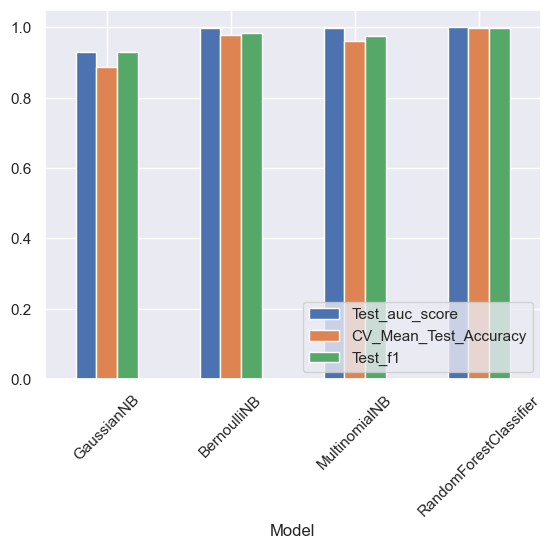

In [30]:
plt.figure(figsize=(10,10))
result[['Test_auc_score','CV_Mean_Test_Accuracy','Test_f1']].set_index(result.Model).plot( kind='bar', rot=45)
plt.legend(loc= 'lower right')
plt.show()

# ROC AUC Characteristics

In [31]:
models_preds = {'GaussianNB':y_pred_test_gnb, 
           'BernoulliNB': y_pred_test_bnb, 
            'MultinomialNB': y_pred_test_mnb, 
          'RandomForestClassifier':y_pred_test_rf}
models_preds=pd.DataFrame(models_preds)
models_preds

,GaussianNB,BernoulliNB,MultinomialNB,RandomForestClassifier
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
1925,1,1,1,1
1926,1,1,1,1
1927,1,1,1,1
1928,1,1,1,1


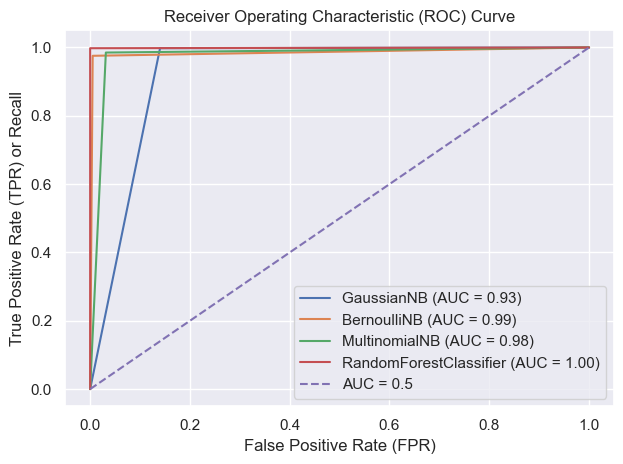

In [32]:
for i in range(4):
    fpr, tpr, thresholds = roc_curve(y_test, models_preds.iloc[:,i])# The confidence score for a sample is proportional to the signeddistance of that sample to the hyperplane.
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{models_preds.columns[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [33]:
import joblib
joblib.dump(clf_rf, 'Random_forest.pkl')

['Random_forest.pkl']

# Conclusion

we have applied GaussianNB , BernoulliNB, MultinomialNB and RandomForest classifier. 
Random forest classifier gives amazing result in both accuracy and AUC. It is classifieng test data with AUC is 1 with 99.9% 
mean accuracy.Similar metrics are for train data.its not overfitting.

BernoulliNB is also giving better Accuracy of 98% with AUC score of 0.98